# Project 1 - Titanic Data Analysis

The motive of the test is to perform a preliminary data wrangling and analysis on Titanic dataset from Kraggle

**Titanic Data** - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

**Question**
1. What factors made people more likely to survive?

I would like to extend the stated question into the following questions:
1. Was sex of the person a factor for survival?
2. Was age of the person a factor for survival?
3. Was Socio Economic class of the person a factor for survival?
4. Was port of embarkment a factore for survival?
5. Was the fact that you had relatives with you on board a factor? 


## Data Description

|<center>Variable            |     <center>    Defination                                       |     <center>     Key                      |
|--------------------|----------------------------------------------------------|-----------------------------------|
|<center>survival            |         Survival                                         |         0 = No, 1 = Yes           |
|<center>pclass              |         Ticket Class                                     |    1 = 1st, 2 = 2nd, 3 = 3rd      |
|<center>name                |         Name                                             |                                   |
|<center>sex                 |         Sex                                              |                                   |
|<center>age                 |          Age in years                                    |                                   |
|<center>sibsp               |         Number of siblings / spouses aboard the Titanic  |                                   |
|<center>parch               |         Number of parents / children aboard the Titanic  |                                   |
|<center>ticket              |         Ticket number	                                |                                   |
|<center>fare                |         Passenger fare                                   |                                   |
|<center>cabin     |         Cabin number                                     |                                   |
|<center>embarked            |         Port of Embarkation                          |C=Cherbourg, Q=Queenstown,S=Southampton|

</center>

## Variable Notes
**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

*Taken from Kaggle*

## Data Wrangling


In [1]:
#Import all the libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as pltt
import seaborn as sns
import scipy.stats as sp

In [2]:
#Load the data set file
file_name = 'titanic-data.csv'
data = pd.read_csv(file_name)

#Display first few entries of the dataset for a better understanding
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Check for any missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


As we can see from the above information, that out of the 891 passenger data we are missing Age, Cabin and Embarked data from 177, 687, 2 rows respectively.

**Data Exploration**

To analyse the data we explore the numeric data in the table (Survived, Pclass, Age, Sibsp, Parch, Fare)   *Not taking PassengerId*

In [4]:
## Subsetting the data
dataSubset1 = data[['Survived','Pclass','Age','SibSp','Parch','Fare']]
dataSubset1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above table we can deduce the following:
1. Only 38.38% of the passensengers survived
2. A high mean of Pclass indicate that the graph will be left skewed and most of the passengers were in class 3
3. Average age of passengers was 29.699, with oldest person of 80 years and youngest person of nearly 6 months
4. Average fare paid by a customer was 32.2. The minimum fare of 0 suggest either these tickets were given for free or an error the maximum fare was 512 which suggest an outlier or error. The 75th percentile of the fair is 31 which is lower than the average, this suggests that the high fair might be an error. 

In [5]:
dataSubset1.median()

Survived     0.0000
Pclass       3.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64

To further analyse the data we look at the medians of all the fields. We can see that:
1. Most passengers did not survive
2. Most passengers were in Pclass 3
3. Maximum passengers were 28 years old
4. The median of fare paid was 14.4542 

By looking at the above information we would want to see how many people paid a very high fare (greater than 200). If only one or two passengers paid a very high price it might be an error.

In [6]:
dataSubset2 = dataSubset1.loc[dataSubset1['Fare'] > 200]
dataSubset2


,Survived,Pclass,Age,SibSp,Parch,Fare
27,0,1,19.0,3,2,263.0000
88,1,1,23.0,3,2,263.0000
118,0,1,24.0,0,1,247.5208
258,1,1,35.0,0,0,512.3292
299,1,1,50.0,0,1,247.5208
311,1,1,18.0,2,2,262.3750
341,1,1,24.0,3,2,263.0000
377,0,1,27.0,0,2,211.5000
380,1,1,42.0,0,0,227.5250
438,0,1,64.0,1,4,263.0000


In [7]:
dataSubset2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,20.000000,20.0,18.000000,20.000000,20.000000,20.000000
mean,0.700000,1.0,31.166667,0.750000,1.050000,279.308545
std,0.470162,0.0,12.926261,1.164158,1.099043,102.353391
min,0.000000,1.0,15.000000,0.000000,0.000000,211.337500
25%,0.000000,1.0,21.500000,0.000000,0.000000,226.088550
50%,1.000000,1.0,28.000000,0.000000,1.000000,247.520800
75%,1.000000,1.0,37.500000,1.250000,2.000000,263.000000
max,1.000000,1.0,64.000000,3.000000,4.000000,512.329200


As we can see from above information that the highest fare of 512.329 is not an error it is an outlier. 
We can also see that Pclass of 1 or a high fare cost increased the chances of survival. 

Now let us lable the data

In [8]:
data['Survival'] = data.Survived.map({0 : 'Died', 1 : 'Survived'})
data['Class'] = data.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
data['Ports'] = data.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,Third Class,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,Third Class,Southampton


### Cleaning the Data (NA values)

To get an accurate picture about the data we will need to clean it it, that is remove all the N/A values

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survival         0
Class            0
Ports            2
dtype: int64

Here we can see all the missing records, the most important is the age. Therefore, we will clean that, by first checking the median and replacing N/A values by it

In [10]:
data.groupby('Survival').Age.median()

Survival
Died        28.0
Survived    28.0
Name: Age, dtype: float64

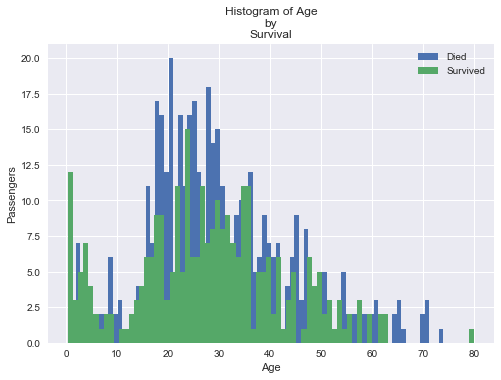

In [11]:
data.groupby('Survival')['Age'].get_group('Died').hist(label = 'Died', bins = 80)
data.groupby('Survival')['Age'].get_group('Survived').hist(label = 'Survived', bins = 80)
pltt.legend()
pltt.title('Histogram of Age\nby\nSurvival')
pltt.xlabel('Age')
pltt.ylabel('Passengers')

As we can see from above table and median age of groups (people who survived and people who perished) is 28.<br> Therefore, we can safely substitute N/A with 28. <br>
From the histogram it is also interesting to note that younger people (in age group of 0 to 20) had a better chance of survival, as the number of younger people who survived was much more than those who perished

In [12]:
data.Age = data.Age.fillna(data.Age.median())
data.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

After filling up the N/A value we check how this change has affected the data. Here we can see that the mean decreased from 31.6 to 29.3, the std has increased from 12.93 to 13.01.
This change is better than dropping all the 177 records.

Now we will write a subfucntion to describe all the variables

In [13]:
def describe(data, var):
    datasub = data.groupby('Survival')[[var]]
    datasub2 = data.groupby(var)[['Survival']]
    datasub3 = data[data.Survival == 'Survived'].groupby(var).count()['Survival']*100
    
    datasub4 = data[var].value_counts().sort_index()
    print (datasub.describe())
    print ("Percentage of passengers survived ")
    print (datasub3/datasub4)
    sns.countplot(x = var, hue = "Survived", data=data)
    stg = 'Histogram of ' + var + '\nby\nSurvival'
    pltt.title(stg)


    

Now let us check for each variable the best chance of survival. <br>
First, let us consider if sex of a person made a difference.

                    Sex
Survival               
Died     count      549
         unique       2
         top       male
         freq       468
Survived count      342
         unique       2
         top     female
         freq       233
Percentage of passengers survived 
Sex
female    74.203822
male      18.890815
dtype: float64


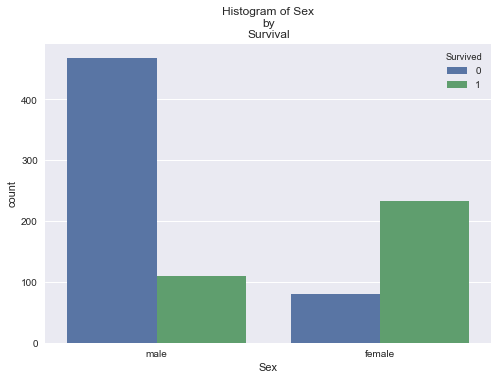

In [14]:
describe(data,'Sex')

As we can see from the above numbers that,
1. females had a 74.2% chance of survival <br>
2 . men only had a 18.89% chance of survival. <br>
<br>
Next, we will look if the socio economic status (SES) made any impact on chance of survival. It is denoted by Pclass. 

                       Class
Survival                    
Died     count           549
         unique            3
         top     Third Class
         freq            372
Survived count           342
         unique            3
         top     First Class
         freq            136
Percentage of passengers survived 
Class
First Class     62.962963
Second Class    47.282609
Third Class     24.236253
dtype: float64


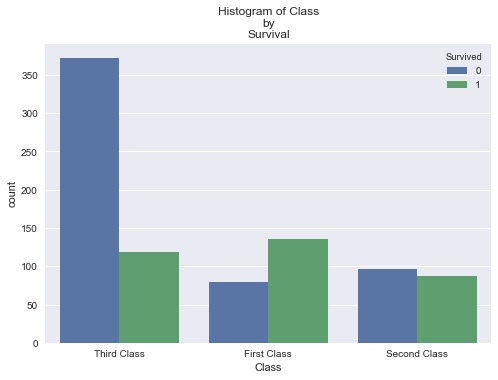

In [15]:
describe(data,"Class")

From the above tables and figures we can see that, <br> 
1. SES was 1 you had a 62.962% chance of survival<br>
2. SES of 2 it dropped to 47.282% chance of survival <br>
3. SES of 3 only 24.23% chance. <br> <br>
Next, let use see if the port of Embarkment made a difference in the chance of survival.

                       Ports
Survival                    
Died     count           549
         unique            3
         top     Southampton
         freq            427
Survived count           340
         unique            3
         top     Southampton
         freq            217
Percentage of passengers survived 
Ports
Cherbourg      55.357143
Queenstown     38.961039
Southampton    33.695652
dtype: float64


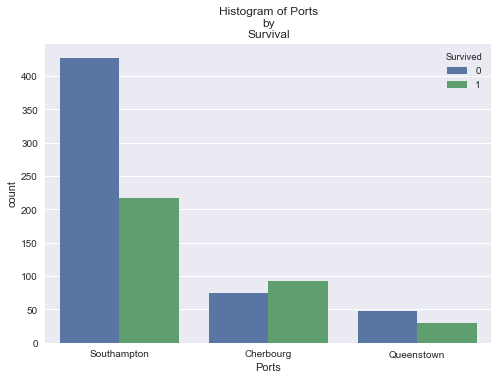

In [16]:
describe(data,"Ports")

As we can see from the tables and figures, that 
1. Embarked from port C had a 55.35% chance of survival, <br>
2. From port Q a 38.96% chance of survial and <br>
3. Port S a 33.69% chance of survival. <br>
<br><br>
Next, let us see if having any family relative (siblings and spouces) affected chance of survival. 

                     SibSp
Survival                  
Died     count  549.000000
         mean     0.553734
         std      1.288399
         min      0.000000
         25%      0.000000
         50%      0.000000
         75%      1.000000
         max      8.000000
Survived count  342.000000
         mean     0.473684
         std      0.708688
         min      0.000000
         25%      0.000000
         50%      0.000000
         75%      1.000000
         max      4.000000
Percentage of passengers survived 
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5          NaN
8          NaN
dtype: float64


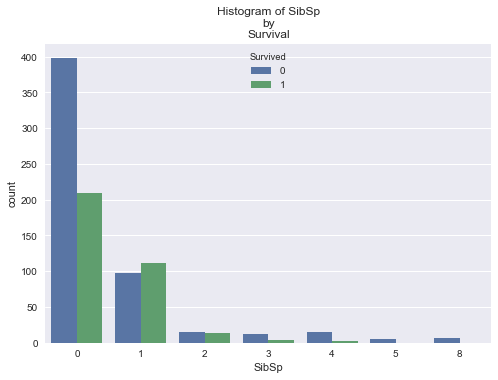

In [17]:
describe(data,"SibSp")

As we can see from the above tables and graphsthat, <br>
1. SibSP was 1 chance of survival was 53.588%, <br>
2. SibSp was 2 chance of survival was 46.42%, <br>
3. SibSp was 3 chance of survival was 25%, <br> 
4. SibSp was 4 chance of survival was 16.667% <br>
5. SibSp was 5 and 8 chance of survival was 0%. <br> 
6. If you were traveling alone (SibSP =0)with no one with you your chance of survival was 34.539%. <br><br>
Next, let us see if having any family relative (Parent and Child) affected chance of survival

                     Parch
Survival                  
Died     count  549.000000
         mean     0.329690
         std      0.823166
         min      0.000000
         25%      0.000000
         50%      0.000000
         75%      0.000000
         max      6.000000
Survived count  342.000000
         mean     0.464912
         std      0.771712
         min      0.000000
         25%      0.000000
         50%      0.000000
         75%      1.000000
         max      5.000000
Percentage of passengers survived 
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4          NaN
5    20.000000
6          NaN
dtype: float64


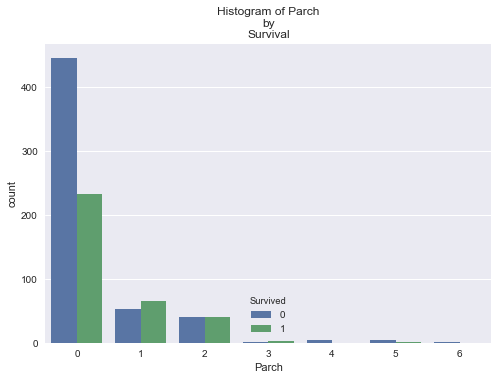

In [18]:
describe(data,"Parch")

From the above table and figure we can see that <br> 
1. If Parch was 3 your chance of survival was best with it being 60%. <br>
2. Parch of 1 gave you a 55.084% chance of survival <br> 
3. Parch of 4 or 6 gave you a 0% chance of surival <br>
4. Parch of 5 gave a 20% chance of survival <br>
5. If you were travelling alone (that is a Parch of 0) gave you a 34.365% chance of survival <br> 


Let us divide the Age into age groups by the following table: <br>
1. 0 - 6 = Infant <br>
2. 6 - 12 = Child <br>
3. 12 - 18 = Teenager <br>
4. ">" 18 = Adult <br>

In [19]:
def age_groups(passenger):
    Age= passenger
    #print(Age)
    if Age < 6:
        return "Infant"
    if Age >= 6 and Age < 12:
        return "Child"
    if Age >= 12 and Age < 18:
        return "Teenager"
    else:
        return "Adult"

                AgeGroup
Survival                
Died     count       549
         unique        4
         top       Adult
         freq        497
Survived count       342
         unique        4
         top       Adult
         freq        281
Percentage of passengers survived 
AgeGroup
Adult       36.118252
Child       33.333333
Infant      70.454545
Teenager    48.888889
dtype: float64


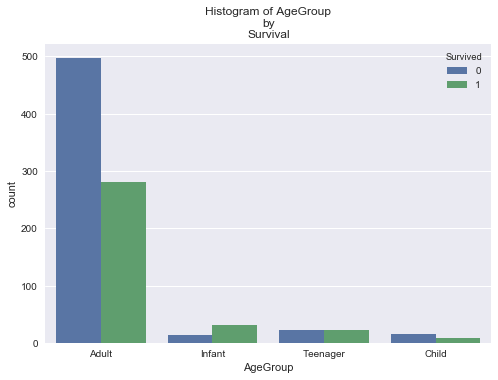

In [20]:
data['AgeGroup'] = data['Age'].apply(age_groups)
describe(data, 'AgeGroup')

From above table and figure we can see that:
1. Infants had the best survival chance of 70.454%
2. Teenagers had a survival chance of 48.89%
3. Adults had a survival chance of 36.12%
4. Children had a survival chance of 33.33%

Let us define a new column called family. Family is if any memeber is present and combines both Parch and SibSp <br> If SibSP + Parch > 0, then family is 1

In [21]:
def family(passenger):
    SibSp, Parch = passenger
    if (SibSp + Parch > 0):
        return "With Family"
    else:
        return "Without Family"

                         Family
Survival                       
Died     count              549
         unique               2
         top     Without Family
         freq               374
Survived count              342
         unique               2
         top        With Family
         freq               179
Percentage of passengers survived 
Family
With Family       50.564972
Without Family    30.353818
dtype: float64


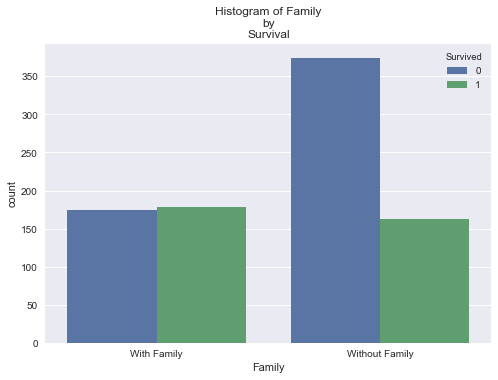

In [22]:
data['Family'] = data[['SibSp','Parch']].apply(family, axis=1)
describe(data, 'Family')

### Statistical Analysis
Till now we have seen just the percentage chance of survival for different groups.<br>
Now, we will see if there is any statistical difference in survival chance of various groups. For this we will be using Chi square tests.

In [23]:
def chitest(data,var):
    data_Check = pd.crosstab(data['Survival'], data[var])
    [chi2, p, dof, ex] = sp.chi2_contingency(data_Check.values)
    print ("Chi Suare test: p value for " + str(var) +" is : "+ str(p))

In [24]:
chitest(data, 'Sex')

Chi Suare test: p value for Sex is : 1.19735706278e-58


In [25]:
chitest(data, 'Class')

Chi Suare test: p value for Class is : 4.5492517113e-23


In [26]:
chitest(data, 'AgeGroup')

Chi Suare test: p value for AgeGroup is : 3.70048566119e-05


In [27]:
chitest(data, 'Ports')

Chi Suare test: p value for Ports is : 1.76992228412e-06


In [28]:
chitest(data, 'Family')

Chi Suare test: p value for Family is : 1.97265438465e-09


As we can see from the Chi square tests that all of the factors are significant p value is less than 0.05.<br><br>
Now, let us take a few of them together and see if there is a difference. 

In [29]:
def par_dif(data, var1, var2):
    sns.factorplot(x=var2, y="Survived", hue=var1, data=data, kind="bar", size=7, aspect=.8)
    sns.plt.title("Survival Rate of " + var1 + " and  " +var2)
    print (data.groupby([var1, var2]).mean()['Survived'])
    
    


Sex     AgeGroup
female  Adult       0.752896
        Child       0.272727
        Infant      0.761905
        Teenager    0.826087
male    Adult       0.165703
        Child       0.384615
        Infant      0.652174
        Teenager    0.136364
Name: Survived, dtype: float64


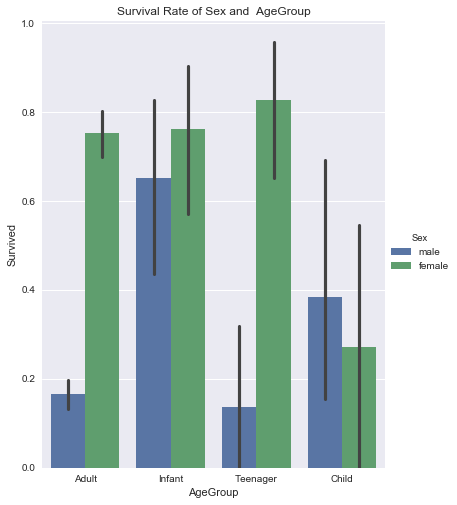

In [30]:
par_dif(data, 'Sex', 'AgeGroup')

From the above statistics we can see that: <br>
1. Female teenagers had the highest chance of survival of 82.6% <br>
2. Male teenagers had the lowest chance of survival of 13.6%

Sex     Class       
female  First Class     0.968085
        Second Class    0.921053
        Third Class     0.500000
male    First Class     0.368852
        Second Class    0.157407
        Third Class     0.135447
Name: Survived, dtype: float64


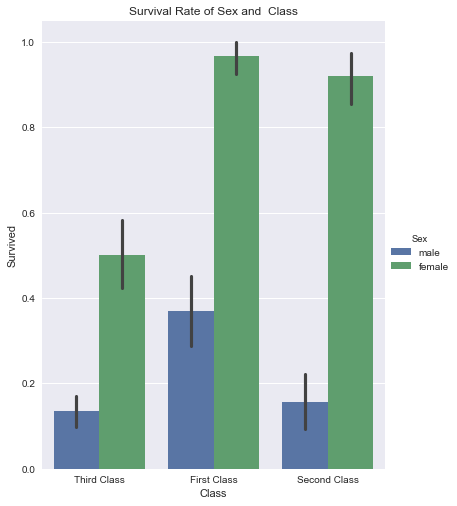

In [31]:
par_dif(data, 'Sex', 'Class')

From the above Statistics we can see that: <br>
1. Females of Class 1 had the highest chance of survival of 96.8% <br>
2. Males of Class 3 had the lowest chance of survival of 13.5%

Sex     Ports      
female  Cherbourg      0.876712
        Queenstown     0.750000
        Southampton    0.689655
male    Cherbourg      0.305263
        Queenstown     0.073171
        Southampton    0.174603
Name: Survived, dtype: float64


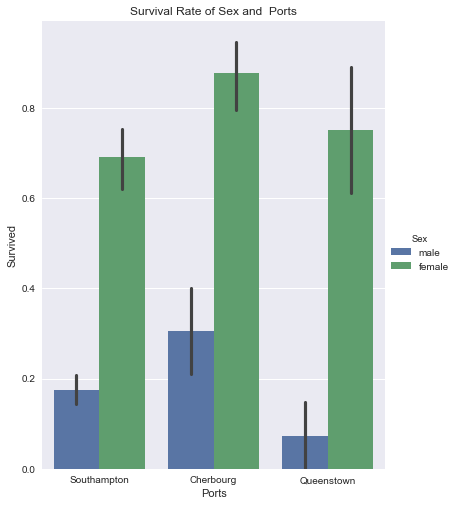

In [32]:
par_dif(data, 'Sex', 'Ports')

From the above statistics we can see that:<br>
1. Females who embarked from port C had the highest chance of survival of 87.6%<br>
2. Males who embarked from port Q had the lowest chance of survival of 7.3%

Sex     Family        
female  With Family       0.712766
        Without Family    0.785714
male    With Family       0.271084
        Without Family    0.155718
Name: Survived, dtype: float64


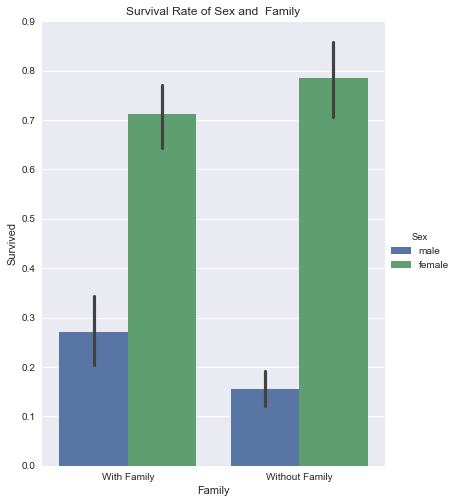

In [33]:
par_dif(data, 'Sex', 'Family')

From above statistics we can see that:<br>
1. Females without family had highest chance of survival of 78.57%<br>
2. Males with family had a better chance of survival than men without families

AgeGroup  Class       
Adult     First Class     0.612745
          Second Class    0.409938
          Third Class     0.217918
Child     First Class     1.000000
          Second Class    1.000000
          Third Class     0.157895
Infant    First Class     0.666667
          Second Class    1.000000
          Third Class     0.571429
Teenager  First Class     1.000000
          Second Class    0.666667
          Third Class     0.322581
Name: Survived, dtype: float64


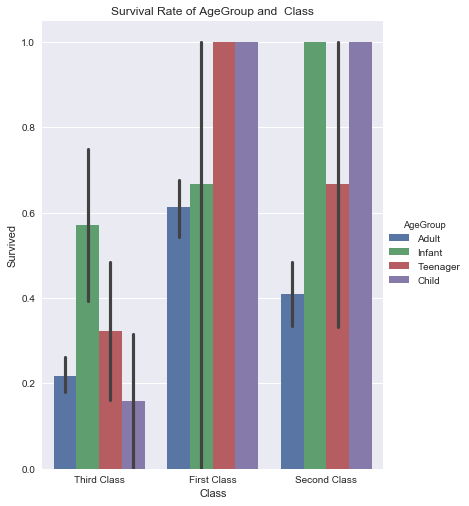

In [34]:
par_dif(data, 'AgeGroup', 'Class')

From above statistics we can see that:
1. Children (AgeGroup 6-12) of Pclass 1 and 2 all survived. (Survival chance: 100%)
2. Infants (AgeGroup 0-2) of Pclass 2 all survived. (Survival chance: 100%)
3. Teenagers (AgeGroup 12-18) of Pclass 1 all survived. (Survival chance: 100%)
4. Adults (AgeGroup 18 and above) of Pclass 3 had the lowest chance of Survival of 21.7%

AgeGroup  Ports      
Adult     Cherbourg      0.520833
          Queenstown     0.385714
          Southampton    0.314947
Child     Cherbourg      0.000000
          Queenstown     0.000000
          Southampton    0.400000
Infant    Cherbourg      1.000000
          Queenstown     0.000000
          Southampton    0.676471
Teenager  Cherbourg      0.714286
          Queenstown     1.000000
          Southampton    0.321429
Name: Survived, dtype: float64


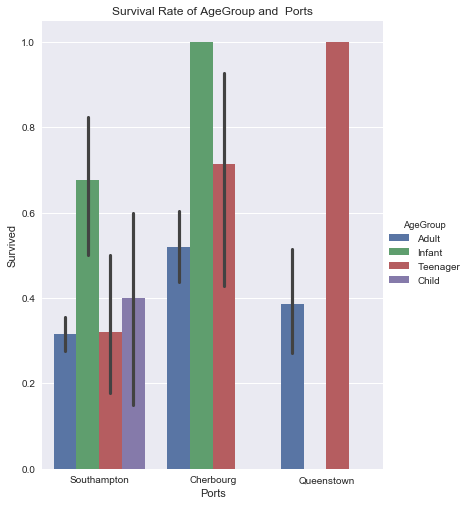

In [35]:
par_dif(data, 'AgeGroup', 'Ports')

From above statistics we can see that:
1. Infants (AgeGroup 0-6) embarked from port C all survived. (Survival chance: 100%)
2. Teenagers (AgeGroup 12-18) embarked from port Q all survived. (Survival chance: 100%)
3. Some have 0% this might be due to fact that no one embarked from these ports in those age groups.
4. Lowest non zero chance of survival for Adults embarked from port S of 31.49%

AgeGroup  Family        
Adult     With Family       0.484848
          Without Family    0.297665
Child     With Family       0.347826
          Without Family    0.000000
Infant    With Family       0.697674
          Without Family    1.000000
Teenager  With Family       0.541667
          Without Family    0.428571
Name: Survived, dtype: float64


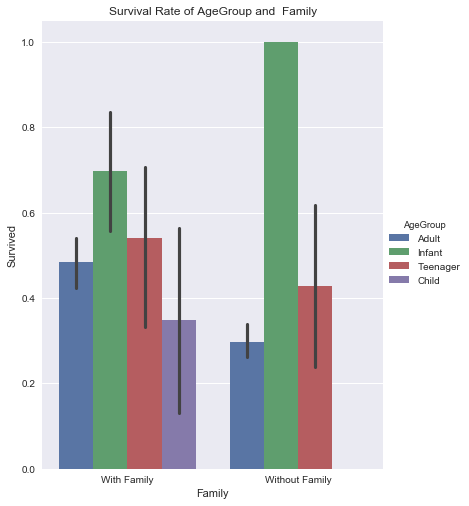

In [36]:
par_dif(data, 'AgeGroup', 'Family')

From above statistics we can see that:
1. Infants (AgeGroup 0-6) without family on board all survived. (Survival chance: 100%)
2. Children (AgeGroup 6-12) who did not have family on board perished (Survival chance: 0%)


Family          Ports      
With Family     Cherbourg      0.674699
                Queenstown     0.350000
                Southampton    0.462151
Without Family  Cherbourg      0.435294
                Queenstown     0.403509
                Southampton    0.256997
Name: Survived, dtype: float64


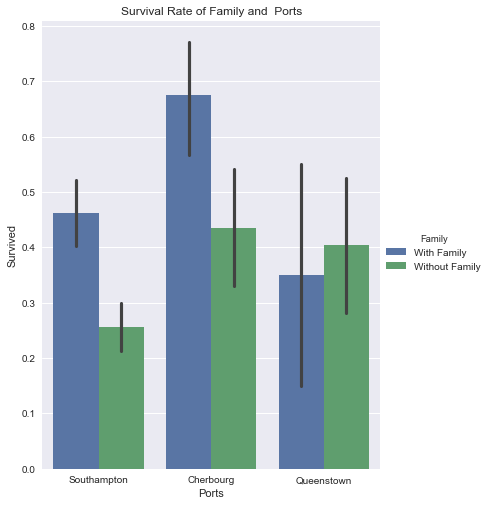

In [37]:
par_dif(data, 'Family', 'Ports')

From above statistics we can see that:
1. Irrespective of whether people had family on board or not. People who embarked from port C had a higher chance of survival than people who embarked from other ports.

## Conclusions:

On the faithful day of April 15 1912, the RMS Titanic sank after colliding with an ice berg killing 1502 out of 2224 passengers and crew. The following about the dataset should be noted:<br>
In the Kaggle dataset we have information of only 891 passgengers and none of the crew. <br>
In reality only 32.4% of all souls survived the disaster but according to the dataset 38.38% survived.<br>
Information about Age is missing, we had to assume the missing age as the median age, which might influence the result <br>
A lot of information about cabin is missing, therefore we have not counted for the cabin number in our calculation. If we knew cabin numbers we could do further analysis if distance from life boat made a difference<br> 

According to the data we can conclude the following:
1. Age, sex, port of embarkment, socio economic all were important for the survival.
2. People who embarked from port C had a better chance of survival (for both males and females)
3. Having family on board increased the chance of survival (except for Infants)
4. Males emabarked from port Q had the lowest chance of survival  (apart from 0%) 
5. Females had a better chance of survival than men (except in AgeGroup of 6-12) 
6. Some groups had a 100% chance of survival (explained above) 


*Note:*
1. Some values may be 0 dues to missing values or there was no one fitting the criteris
2. Some have 100% chance of survival this may be due to fact that there was 1 passenger fitting the criteria who survived. 
3. Above analysis does not guarantee anything as a alot of data is missing

## References:
1. Annova and box plots: http://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/ 
2. Kaggle informatiom: https://www.kaggle.com/c/titanic
3. Pandas tutorial: http://pandas.pydata.org/pandas-docs/stable/ 
4. Seaborn tutorial:  https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
5. Coding queries: https://stackoverflow.com
6. Guidance to start: https://github.com/rahulravindran0108/Titanic-Survival-Exploraton
